# **Course Project #02: State Sales Strategy for 2019**:



/tmp/ipython-input-1305546031.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fmt_values = top10_states.applymap(lambda x: f"${x:,.0f}")


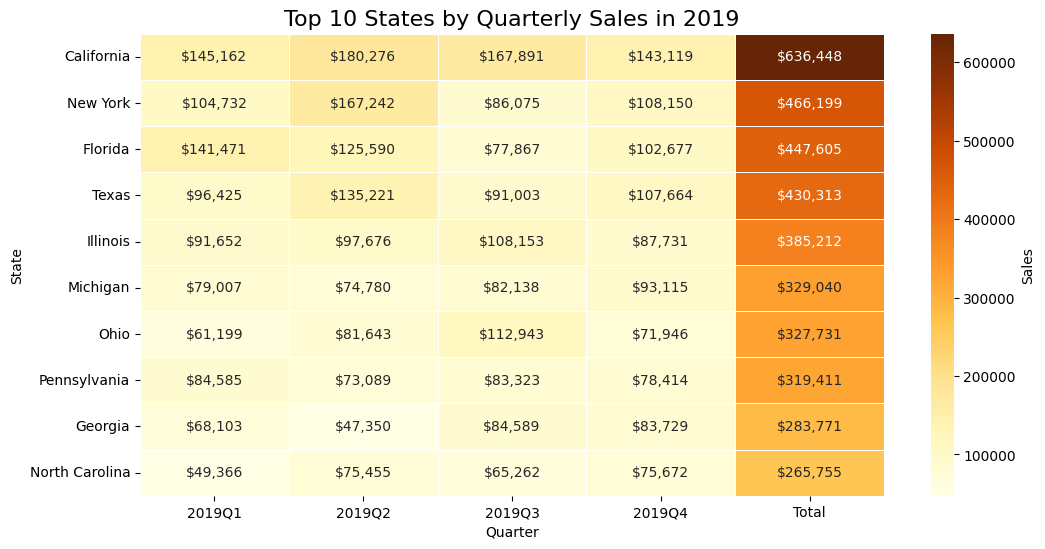

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_2019 = pd.read_csv("/content/Superstore_Synthetic_2019.csv")
df_2019['Order Date'] = pd.to_datetime(df_2019['Order Date'])
df_2019['Quarter'] = df_2019['Order Date'].dt.to_period('Q')

quarterly_sales = df_2019.groupby(['State', 'Quarter'])['Sales'].sum().reset_index()
sales_pivot = quarterly_sales.pivot(index='State', columns='Quarter', values='Sales').fillna(0)
sales_pivot['Total'] = sales_pivot.sum(axis=1)
top10_states = sales_pivot.sort_values('Total', ascending=False).head(10)

fmt_values = top10_states.applymap(lambda x: f"${x:,.0f}")

plt.figure(figsize=(12,6))
sns.heatmap(top10_states, annot=fmt_values, fmt='', cmap="YlOrBr", linewidths=.5, cbar_kws={'label': 'Sales'})
plt.title("Top 10 States by Quarterly Sales in 2019", fontsize=16)
plt.xlabel("Quarter")
plt.ylabel("State")
plt.show()
